# Week 2: Regression

## Sources
- [Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression)
- [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)
- [Quick Reference Guide on Linear Regression](https://www.dataschool.io/applying-and-interpreting-linear-regression/)
- [Training, validation, and test sets](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets)

## Rob Pike's 5 Rules of Programming

These are the rules to know by heart when you are starting to write any code:

1. You can't tell where a program is going to spend its time. Bottlenecks occur in surprising places, so don't try to second guess and put in a speed hack until you've proven that's where the bottleneck is.
1. Measure. Don't tune for speed until you've measured, and even then don't unless one part of the code overwhelms the rest.
1. Fancy algorithms are slow when n is small, and n is usually small. Fancy algorithms have big constants. Until you know that n is frequently going to be big, don't get fancy. (Even if n does get big, use Rule 2 first.)
1. Fancy algorithms are buggier than simple ones, and they're much harder to implement. Use simple algorithms as well as simple data structures.
1. Data dominates. If you've chosen the right data structures and organized things well, the algorithms will almost always be self-evident. Data structures, not algorithms, are central to programming.

## Linear Regression and Model Testing

In this week, we will implement simple linear regression and use it for analyzing different features of an automobile dataset, where the target variable is the highway mileage.

We will start with importing the libraries we are going to use. I recommend that you get familiar with [Numpy](http://www.numpy.org/).

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn context and style.
sns.set_style('whitegrid')
sns.set_context('talk')

### Q1. Load the dataset and take a look at the first 10 rows.

In [2]:
dataset = pd.read_csv("data/mpg.csv")
dataset.head(10)

,MPG Highway,Passengers,Length,Wheelbase,Width,U Turn Space,Rear seat,Luggage,Weight,Horsepower,Fueltank
0,31,5,177,102,68,37,26.5,11,2705,140,13.2
1,25,5,195,115,71,38,30.0,15,3560,200,18.0
2,26,5,180,102,67,37,28.0,14,3375,172,16.9
3,26,6,193,106,70,37,31.0,17,3405,172,21.1
4,30,4,186,109,69,39,27.0,13,3640,208,21.1
5,31,6,189,105,69,41,28.0,16,2880,110,16.4
6,28,6,200,111,74,42,30.5,17,3470,170,18.0
7,25,6,216,116,78,45,30.5,21,4105,180,23.0
8,27,5,198,108,73,41,26.5,14,3495,170,18.8
9,25,6,206,114,73,43,35.0,18,3620,200,18.0


### Q2. Select two different attributes and plot them against the target variable. Describe if these attributes have a linear relationship with the target variable or not. (Hint: [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html))

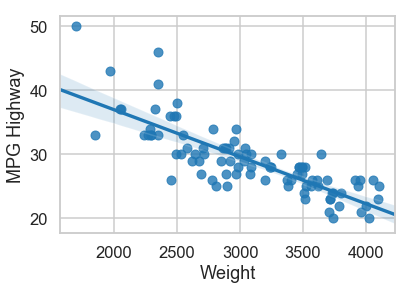

In [16]:
sns.regplot(x="Weight", y="MPG Highway", data = dataset)

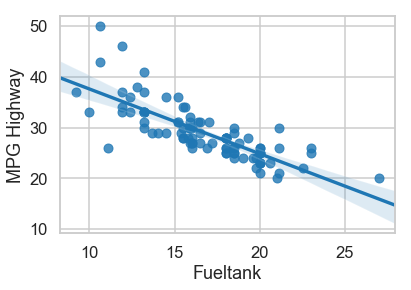

In [17]:
sns.regplot(x= "Fueltank", y="MPG Highway", data = dataset)

#### It looks like both of the two attributes have the linear negative relationship with MPG Highway. 
#### When the tank size is larger, the MPG higheway is lower.

In [ ]:
how many miles a car can drive per gallon on the highway 

### Q3. Before we can fit a linear regression model, we need to have a function to calculate covariance. Define the covariance function and use it to find the covariance between an attribute you chose in the previous question and the target variable.

In [28]:
def covariance(x, y):

    # Get the size of each array.
    nx, ny = np.size(x), np.size(y)

    # If they are not same size, we cannot calculate the covariance.
    if nx != ny:
        return None
    else:
        cov = sum((x - x.mean())*(y - y.mean())) / (nx-1)
        return cov


In [29]:
covariance(dataset["Fueltank"], dataset["MPG Highway"])

-13.74365357643758

#### Testing:

In [24]:
np.cov(dataset["Fueltank"], dataset["MPG Highway"])

array([[ 10.75427069, -13.74365358],
       [-13.74365358,  28.42730248]])

### Q4. Calculate the coefficients for a simple linear regression model between the attribute you chose and the target variable. Then, plot the fitted line over a scatter plot to check how good of a fit it is. (Hint: $Cov(x, x) = Var(x)$)

In [35]:
beta = covariance(dataset["Fueltank"], dataset["MPG Highway"]) / covariance(dataset["Fueltank"], dataset["Fueltank"])

In [62]:
beta

-1.2779716985130662

In [51]:
alpha = dataset["MPG Highway"].mean() - (beta * dataset["Fueltank"].mean())

In [63]:
alpha

50.382801487694095

#### Testing:

In [211]:
simple_linear_regression(dataset["Fueltank"], dataset["MPG Highway"])

(50.382801487694095, -1.2779716985130662)

In [162]:
predicted = alpha + (beta * dataset["Fueltank"])

Text(0.5,1,'Scatter Plot')

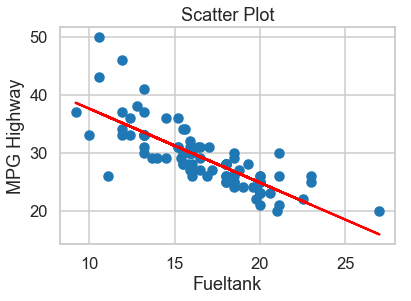

In [235]:
plt.scatter(dataset["Fueltank"], dataset["MPG Highway"])
plt.plot(dataset["Fueltank"], predicted, color="red" )
plt.xlabel("Fueltank")
plt.ylabel("MPG Highway")
plt.title("Scatter Plot")

### Q5. Define a function that returns the regression coefficients given $x$ and $y$.

In [64]:
def simple_linear_regression(x, y):
    """ given the dependent and indeppendent series, return alpha, beta """
    
    beta = covariance(x, y) / covariance(x, x)
    alpha = y.mean() - (beta * x.mean())
    
    return alpha, beta

In [65]:
simple_linear_regression(dataset["Fueltank"], dataset["MPG Highway"])

(50.382801487694095, -1.2779716985130662)

### Q6. Any model you fit, you need to measure how good it is. Implement [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) and [R2 score](https://en.wikipedia.org/wiki/Coefficient_of_determination) as functions.

In [71]:
def mean_squared_error(y_true, y_pred):
    """ given the actual y value and the predicted y value, return the MSE """
    
    n = np.size(y_true)
    
    mse = 1/n * sum((y_true - y_pred)**2)
    
    return mse

In [72]:
mean_squared_error(dataset["MPG Highway"], predicted)

10.74649247215395

#### Testing:

In [167]:
print('MSE:', metrics.mean_squared_error(dataset["MPG Highway"], predicted))

MSE: 10.746492472153953


In [81]:
def r2_score(y_true, y_pred):
    """ given the actual y value and the predicted y value, return the R squared """
    
    ss_total = sum((y_true - y_true.mean())**2)
    
    ss_res = sum((y_true - y_pred)**2)
    
    r2 = 1 - (ss_res / ss_total) 
    
    return r2

In [165]:
r2_score(dataset["MPG Highway"], predicted)

0.6178567353893549

#### Testing:

In [166]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(dataset["MPG Highway"], predicted)
coefficient_of_dermination

0.6178567353893549

### Q7. Fit a simple linear regression model for all the attributes and calculate MSE and R2 scores. Which one has the best scores? Why do you think it has the best scores?

In [246]:
y = dataset["MPG Highway"]

for c in dataset.iloc[:, 1:]:
    x = dataset[c]
    alpha, beta = simple_linear_regression(x, y)
    predicted_y = alpha + (beta * x)
    mse = mean_squared_error(y, predicted_y)
    r2 = r2_score(y, predicted_y)
    print(c, "/ MPG Highway: MSE = ", mse, " R2=", r2)
    

Passengers / MPG Highway: MSE =  22.004734861714564  R2= 0.21751573932272628
Length / MPG Highway: MSE =  19.833130107578747  R2= 0.2947375986726285
Wheelbase / MPG Highway: MSE =  17.472032882869517  R2= 0.378697774874443
Width / MPG Highway: MSE =  16.59007798616212  R2= 0.4100599262313087
U Turn Space / MPG Highway: MSE =  18.209886565260533  R2= 0.35245983577715034
Rear seat / MPG Highway: MSE =  24.275845639044615  R2= 0.1367554643781166
Luggage / MPG Highway: MSE =  24.5812638128429  R2= 0.125894851177194
Weight / MPG Highway: MSE =  9.641038123897447  R2= 0.6571664854883194
Horsepower / MPG Highway: MSE =  17.34499878385372  R2= 0.3832150837024685
Fueltank / MPG Highway: MSE =  10.74649247215395  R2= 0.6178567353893549


#### When we are testing the error rates, we are looking for the rate as small as possible in order to get the best model. In this case, the smallest MSE is 9.64 when the independent variable is Weight. 
#### Moreover, we can also know how good the line fits the data. Here, we can measure the R-squared which is the fraction of  the total variation in y that's captured by your model. 0 is bad( none of the variance is captured ) and 1 is good( all of the variance is captured ). The highest R-squared is 65.7% when the independent variable is Weight.

#### I can say that when independent variable is Weight, it has the best score since it has the highest R-squared and lowest MSE with MPG Highway.

### Q8. Fit a multivariable linear regression model using all attributes at the same time. What are MSE and R2? You can use scikit-learn library.

In [214]:
from sklearn.linear_model import LinearRegression

In [215]:
independent_variables = dataset.iloc[:,1:]

In [216]:
target_variable = dataset["MPG Highway"]

In [217]:
lm = LinearRegression()

In [218]:
lm.fit(independent_variables, target_variable)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [219]:
predictions = lm.predict(independent_variables)

In [220]:
from sklearn import metrics

In [222]:
r2_score(target_variable, predictions)

0.7455630408034933

#### Testing:

In [223]:
print('MSE:', metrics.mean_squared_error(target_variable, predictions))

MSE: 7.1551826758713295


In [135]:
mean_squared_error(target_variable, predictions)

7.1551826758713295

#### The MSE is 7.15 and the R-squared is 74.5%

### Q9. For proper testing of model quality, split the data into two sets: train and test. Fit the model on training dataset and measure performance on test dataset.

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
independent_variables = dataset.iloc[:,1:]

In [171]:
target_variable = dataset["MPG Highway"]

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target_variable, test_size=0.4, random_state=101)

In [174]:
linear_regression = LinearRegression()

In [175]:
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### The intercept:

In [176]:
print(linear_regression.intercept_)

7.698044372937218


#### The coefficients:

In [177]:
coeff_df = pd.DataFrame(linear_regression.coef_,dependent_variables.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Passengers,-1.548684
Length,0.039409
Wheelbase,0.335132
Width,0.262670
U Turn Space,-0.052522
Rear seat,0.274201
Luggage,0.008009
Weight,-0.009154
Horsepower,-0.015115
Fueltank,-0.406316


In [185]:
prediction = linear_regression.predict(X_test)

#### It is better to fit a straight line!

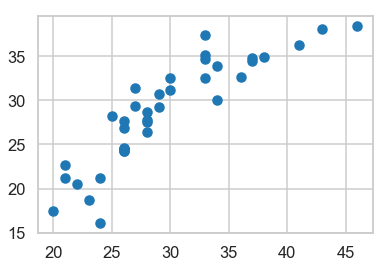

In [186]:
plt.scatter(y_test,prediction)

### Assumptions:

#### Errors normally distributed testing:

In [226]:
errors = y_test - prediction

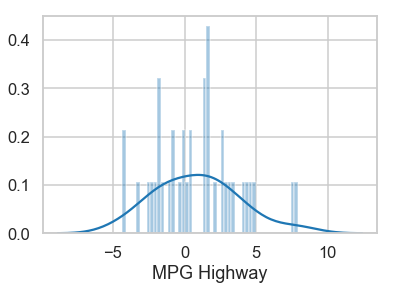

In [227]:
sns.distplot(errors,bins=50);

In [243]:
errors.mean()

0.8734735406099197

#### It looks like the mean of the errors are not 0 but it is closed.

#### Homoscedastic testing:

Text(0.5,1,'Normality of errors')

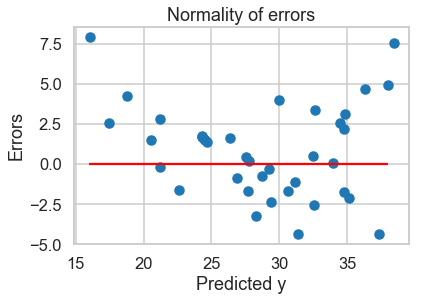

In [236]:
plt.scatter(prediction, errors)
plt.hlines(0,16,38, color = "red")
plt.xlabel("Predicted y")
plt.ylabel("Errors")
plt.title("Normality of errors")

#### It looks like it is not homoscedasticity.

#### The independency of errors:


Text(0.5,1,'Independence of errors')

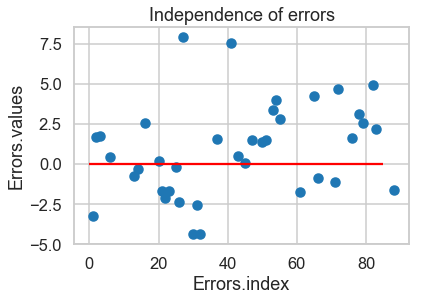

In [240]:
plt.scatter(errors.index, errors.values)
plt.hlines(0,0,85, color = "red")
plt.xlabel("Errors.index")
plt.ylabel("Errors.values")
plt.title("Independence of errors")

#### MSE:

In [188]:
mean_squared_error(y_test, prediction)

9.079558249040511

In [189]:
print('MSE:', metrics.mean_squared_error(y_test, prediction))

MSE: 9.079558249040511


#### R-squared:

In [190]:
r2_score(y_test, prediction)

0.757923151558078

In [191]:
coefficient_of_dermination = r2_score(y_test, prediction)
coefficient_of_dermination

0.757923151558078

#### 75.7% of R-squared actually is not too bad since in real life is hard to really get the linear model.